# Load data from kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/My\ Drive/Data\ Analytics/kaggle.json ~/.kaggle/


cp: cannot stat '/content/drive/My Drive/Data Analytics/kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jp797498e/twitter-entity-sentiment-analysis

Dataset URL: https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis
License(s): CC0-1.0
  0% 0.00/1.99M [00:00<?, ?B/s]
100% 1.99M/1.99M [00:00<00:00, 64.9MB/s]


In [ ]:
!unzip /content/twitter-entity-sentiment-analysis.zip -d /content/twitter-entity-sentiment-analysis

Archive:  /content/twitter-entity-sentiment-analysis.zip
  inflating: /content/twitter-entity-sentiment-analysis/twitter_training.csv  
  inflating: /content/twitter-entity-sentiment-analysis/twitter_validation.csv  


# Data preproccesing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

In [ ]:
data_training = pd.read_csv('/content/twitter-entity-sentiment-analysis/twitter_training.csv')
data_validation = pd.read_csv('/content/twitter-entity-sentiment-analysis/twitter_validation.csv')

In [ ]:
column_name=['tweetID','entity','sentiment','comment']
data_training.columns=column_name
data_validation.columns=column_name
print(data_training.head())
print(data_validation.head())
data_training.columns.tolist()
data_validation.columns.tolist()

   tweetID       entity sentiment  \
0     2401  Borderlands  Positive   
1     2401  Borderlands  Positive   
2     2401  Borderlands  Positive   
3     2401  Borderlands  Positive   
4     2401  Borderlands  Positive   

                                             comment  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
   tweetID     entity sentiment  \
0      352     Amazon   Neutral   
1     8312  Microsoft  Negative   
2     4371      CS-GO  Negative   
3     4433     Google   Neutral   
4     6273       FIFA  Negative   

                                             comment  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of closet hacking,...  
3  Now the Presi

['tweetID', 'entity', 'sentiment', 'comment']

In [ ]:
print('Duplicate data training: ', data_training.duplicated().sum())
print('Duplicate data validation: ', data_validation.duplicated().sum())
print('Null data training:\n', data_training.isnull().sum())
print('Null data validation:\n', data_validation.isnull().sum())


Duplicate data training:  2700
Duplicate data validation:  0
Null data training:
 tweetID        0
entity         0
sentiment      0
comment      686
dtype: int64
Null data validation:
 tweetID      0
entity       0
sentiment    0
comment      0
dtype: int64


In [ ]:
data_training.dropna(inplace=True)
data_training.drop_duplicates(inplace=True)

In [ ]:
print('Duplicate data training: ', data_training.duplicated().sum())
print('Null data training:\n', data_training.isnull().sum())

Duplicate data training:  0
Null data training:
 tweetID      0
entity       0
sentiment    0
comment      0
dtype: int64


In [ ]:
data_training.drop(columns=['tweetID','entity'],inplace=True)
data_validation.drop(columns=['tweetID','entity'],inplace=True)

In [ ]:
print(data_training.head())
print(data_validation.head())

  sentiment                                            comment
0  Positive  I am coming to the borders and I will kill you...
1  Positive  im getting on borderlands and i will kill you ...
2  Positive  im coming on borderlands and i will murder you...
3  Positive  im getting on borderlands 2 and i will murder ...
4  Positive  im getting into borderlands and i can murder y...
  sentiment                                            comment
0   Neutral  BBC News - Amazon boss Jeff Bezos rejects clai...
1  Negative  @Microsoft Why do I pay for WORD when it funct...
2  Negative  CSGO matchmaking is so full of closet hacking,...
3   Neutral  Now the President is slapping Americans in the...
4  Negative  Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

data_training['comment'] = data_training['comment'].apply(clean_text)
data_validation['comment'] = data_validation['comment'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


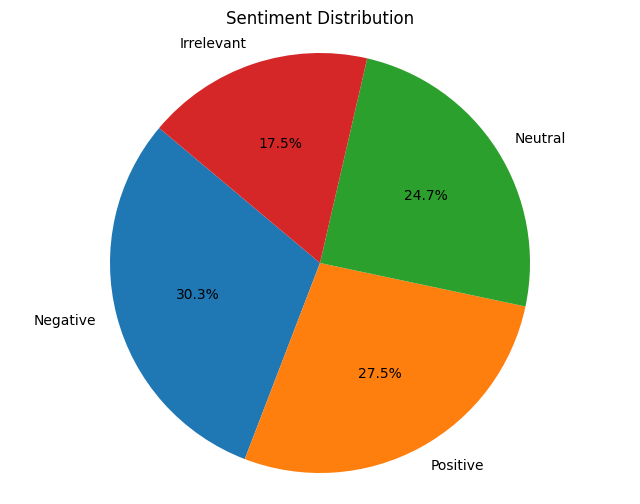

In [ ]:
sentiment_counts = data_training['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

# Data proccesing

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(data_training['comment'])
y_train = data_training['sentiment']
X_test = vectorizer.transform(data_validation['comment'])
y_test = data_validation['sentiment']

In [ ]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
predictions = nb_classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, predictions, output_dict=True)
df_report_nb = pd.DataFrame(report).transpose()
print("Classification Report Naive Bayes:")
print(df_report_nb)

Classification Report Naive Bayes:
              precision    recall  f1-score     support
Irrelevant     0.900709  0.742690  0.814103  171.000000
Negative       0.778878  0.887218  0.829525  266.000000
Neutral        0.903766  0.757895  0.824427  285.000000
Positive       0.787975  0.898917  0.839798  277.000000
accuracy       0.828829  0.828829  0.828829    0.828829
macro avg      0.842832  0.821680  0.826963  999.000000
weighted avg   0.837883  0.828829  0.828279  999.000000


In [ ]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
svm_predictions = clf.predict(X_test)

In [ ]:
report = classification_report(y_test, svm_predictions, output_dict=True)
df_report_svm = pd.DataFrame(report).transpose()
print("Classification Report SVM:")
print(df_report_svm)

Classification Report SVM:
              precision    recall  f1-score     support
Irrelevant     0.958580  0.947368  0.952941  171.000000
Negative       0.966038  0.962406  0.964218  266.000000
Neutral        0.961404  0.961404  0.961404  285.000000
Positive       0.939286  0.949458  0.944345  277.000000
accuracy       0.955956  0.955956  0.955956    0.955956
macro avg      0.956327  0.955159  0.955727  999.000000
weighted avg   0.956021  0.955956  0.955975  999.000000


In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)

In [ ]:
report = classification_report(y_test, rf_predictions, output_dict=True)
df_report_rf = pd.DataFrame(report).transpose()
print("Classification Report Random Forest:")
print(df_report_rf)

Classification Report Random Forest:
              precision    recall  f1-score     support
Irrelevant     0.993631  0.912281  0.951220  171.000000
Negative       0.938406  0.973684  0.955720  266.000000
Neutral        0.954225  0.950877  0.952548  285.000000
Positive       0.950355  0.967509  0.958855  277.000000
accuracy       0.954955  0.954955  0.954955    0.954955
macro avg      0.959154  0.951088  0.954586  999.000000
weighted avg   0.955685  0.954955  0.954914  999.000000


In [ ]:
accuracy_svm = df_report_svm.loc['accuracy', 'precision']
accuracy_nb = df_report_nb.loc['accuracy', 'precision']
accuracy_rf = df_report_rf.loc['accuracy', 'precision']
f1_svm = df_report_svm.loc['weighted avg', 'f1-score']
f1_nb = df_report_nb.loc['weighted avg', 'f1-score']
f1_rf = df_report_rf.loc['weighted avg', 'f1-score']

df_comparison = pd.DataFrame({
    'Model': ['SVM', 'Naive Bayes', 'Random Forest'],
    'Accuracy': [accuracy_svm, accuracy_nb, accuracy_rf],
    'F1 Score': [f1_svm, f1_nb, f1_rf]
})

<ipython-input-44-c2c77f81bd81>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1 Score', data=df_comparison, palette='viridis')


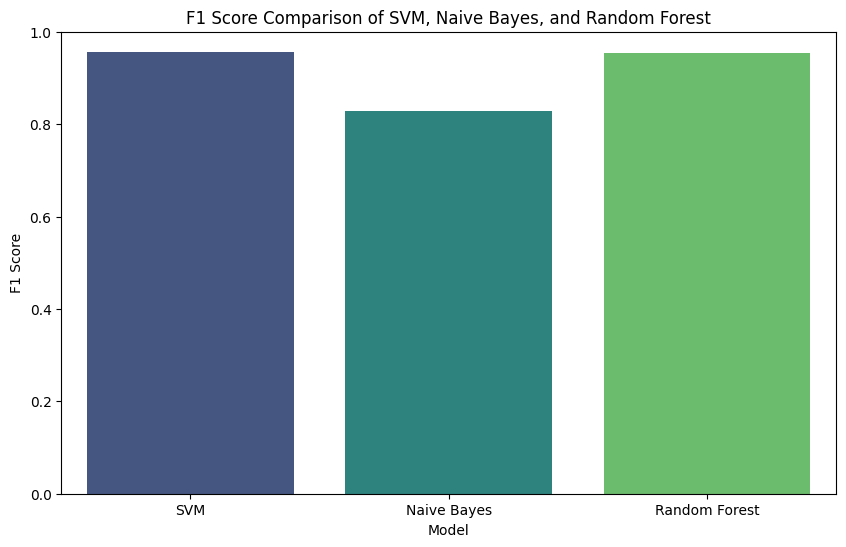

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=df_comparison, palette='viridis')
plt.title('F1 Score Comparison of SVM, Naive Bayes, and Random Forest')
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

<ipython-input-40-2a7bb0976000>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_comparison, palette='viridis')


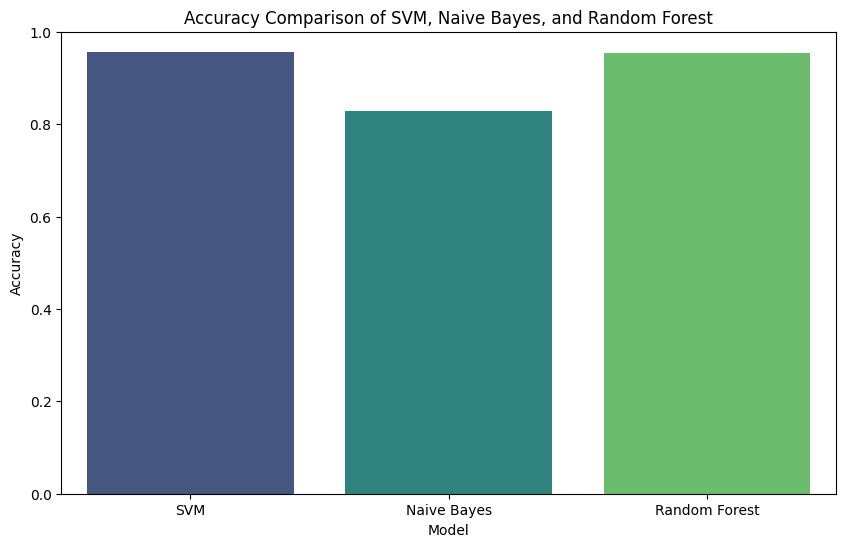

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_comparison, palette='viridis')
plt.title('Accuracy Comparison of SVM, Naive Bayes, and Random Forest')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

In [ ]:
models = ['SVM', 'Naive Bayes', 'Random Forest']
times = [42*60 + 49, 1, 5*60 + 2]
plt.figure(figsize=(10, 6))
plt.bar(models, times, color=['blue', 'green', 'red'])
plt.title('Comparison of Model Training Times')
plt.xlabel('Models')
plt.ylabel('Time (seconds)')
for i, time in enumerate(times):
    plt.text(i, time + 10, f'{time//60}m {time%60}s', ha='center', va='bottom')
plt.show()